<a href="https://colab.research.google.com/github/mbraddy/CAP4630-AI/blob/master/hw2/CAP4630_Braddy_HW2_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


(60000, 28, 28)

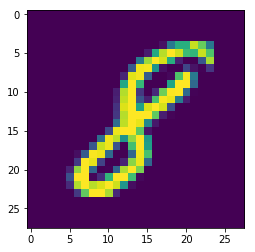

In [0]:
import matplotlib.pyplot as plt
import numpy as np

print(y_train[7777])
plt.imshow(x_train[7777])
x_train.shape

In [0]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train: ', x_train.shape)
print('x_train_image_count: ', x_train.shape[0])
print('x_test_image_count: ', x_test.shape[0])

('x_train: ', (60000, 784))
('x_train_image_count: ', 60000)
('x_test_image_count: ', 10000)


In [0]:
from keras.models import Sequential
from keras.layers import Dense


    build(input_shape): this is where you will define your weights. This method must set self.built = True at the end, which can be done by calling super([Layer], self).build().
    call(x): this is where the layer's logic lives. Unless you want your layer to support masking, you only have to care about the first argument passed to call: the input tensor.
    compute_output_shape(input_shape): in case your layer modifies the shape of its input, you should specify here the shape transformation logic. This allows Keras to do automatic shape inference.


WIP

In [0]:
class CustomLayer(tf.keras.layers.Layer):
 def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(MyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(MyLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        return K.dot(x, self.kernel)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

In [0]:
model = Sequential()
model.add(Dense(512, 
                activation='softmax',
                input_shape=(784,)))

In [0]:
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 68us/step


[2.301491114807129, 0.1135]